In [2]:
%pip install folium



   ---------------------------------------- 2/2 [folium]

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline

In [6]:

import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv"
df = pd.read_csv(URL)
print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [7]:
df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


In [8]:
df.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced'],
      dtype='object')

In [9]:
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
dtype: object

In [15]:
import datetime as dt

df["Year"] = pd.to_datetime(df["Date"]).dt.year
df["Month"] = pd.to_datetime(df["Date"]).dt.month

In [16]:
df.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced', 'Year', 'Month'],
      dtype='object')

In [17]:
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
Year                                     int32
Month                                    int32
dtype: object

TASK 1.1: Let's try to understand the change in average estimated fire area over time
(use pandas to plot)¶

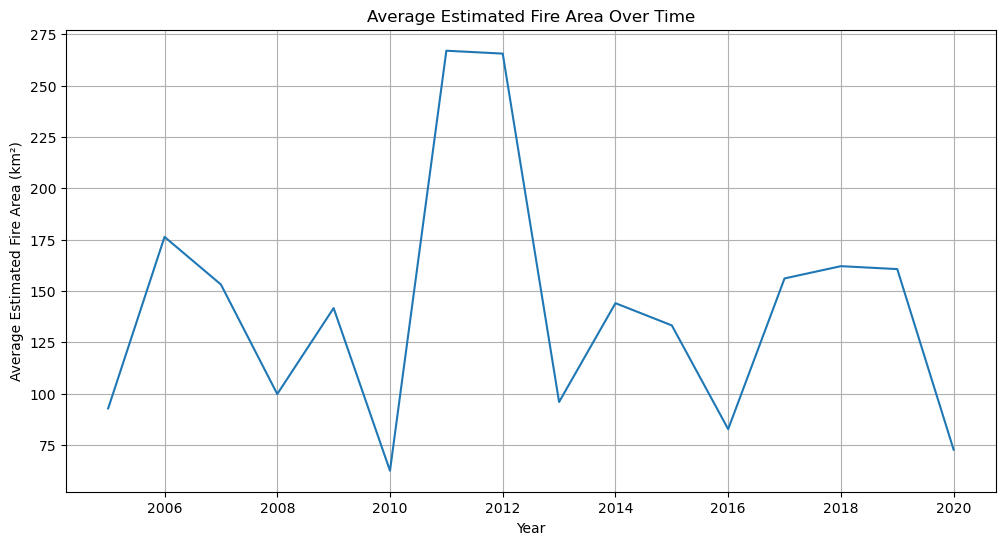

In [23]:
# Make sure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group by Date and calculate average estimated fire area
daily_avg_area = df.groupby('Year')['Estimated_fire_area'].mean()

# Plot the line chart
plt.figure(figsize=(12, 6))
daily_avg_area.plot(x=daily_avg_area.index, y=daily_avg_area.values)
plt.title('Average Estimated Fire Area Over Time')
plt.xlabel('Year')
plt.ylabel('Average Estimated Fire Area (km²)')
plt.grid(True)
plt.show()

#### TASK 1.2: You can notice the peak in the plot between 2010 to 2013. Let's narrow down our finding, by plotting the estimated fire area for year grouped together with month.

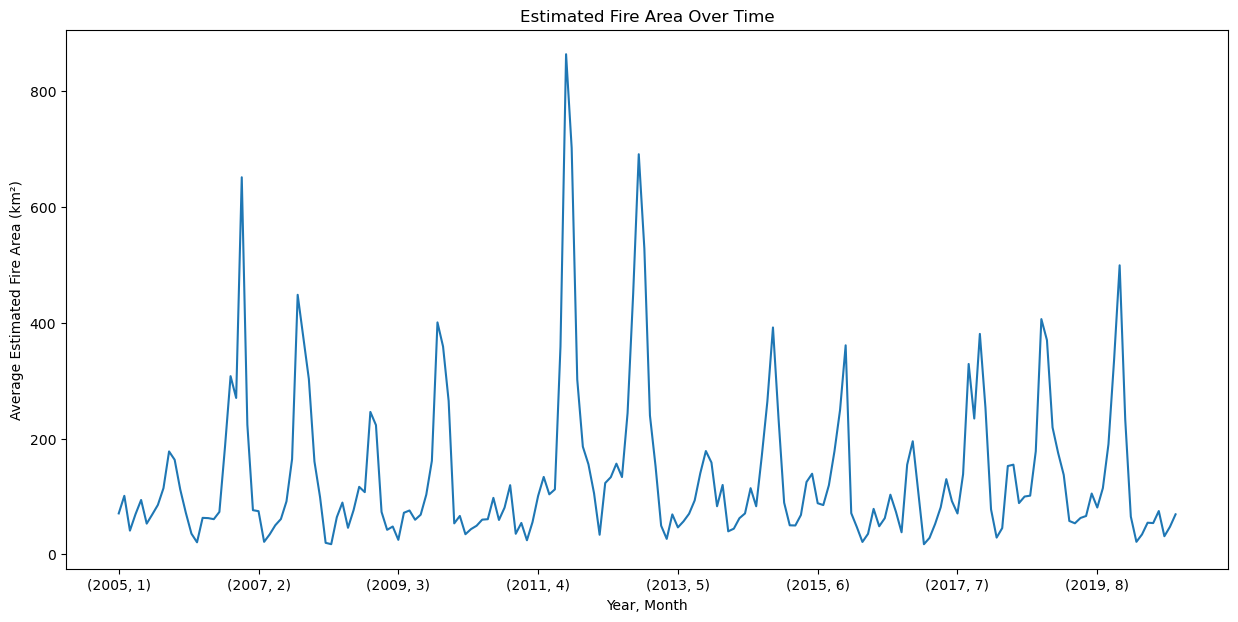

In [25]:
# Group by Year and Month, then calculate average estimated fire area
monthly_avg_area = df.groupby(['Year', 'Month'])['Estimated_fire_area'].mean()


# Plot the pivot table
plt.figure(figsize=(15, 7))
monthly_avg_area.plot(x=monthly_avg_area.index, y=monthly_avg_area.values)
plt.title('Estimated Fire Area Over Time')
plt.xlabel('Year, Month')
plt.ylabel('Average Estimated Fire Area (km²)')
plt.show()

### TASK 1.3: Let's have an insight on the distribution of mean estimated fire brightness across the regions use the functionality of seaborn to develop a barplot¶

In [27]:
df["Region"].unique()

array(['NSW', 'NT', 'QL', 'SA', 'TA', 'VI', 'WA'], dtype=object)

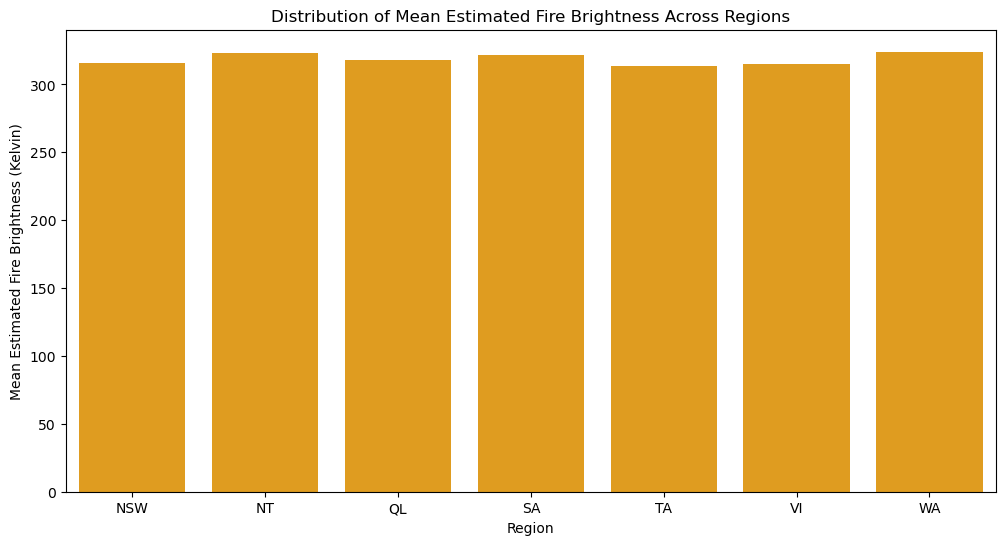

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# barplot code
sns.barplot(
    x='Region', 
    y='Mean_estimated_fire_brightness', 
    data=df, 
    errorbar=None,       # replaces ci=None
    color='orange'       # replaces palette when hue is not used
)

plt.title('Distribution of Mean Estimated Fire Brightness Across Regions')
plt.xlabel('Region')
plt.ylabel('Mean Estimated Fire Brightness (Kelvin)')
plt.show()


### TASK 1.4: Let's find the portion of count of pixels for presumed vegetation fires vary across regions we will develop a pie chart for this

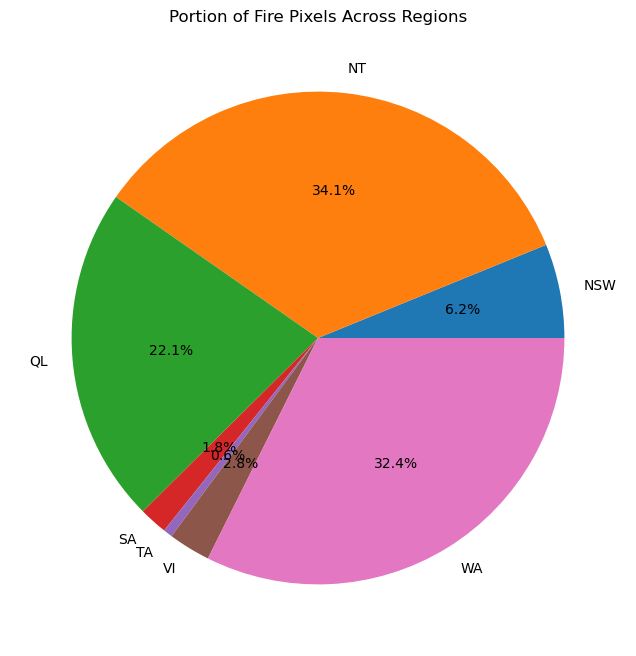

In [30]:
import matplotlib.pyplot as plt

# Aggregate total count of fire pixels by region
region_counts = df.groupby('Region')['Count'].sum()

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%')
plt.title('Portion of Fire Pixels Across Regions')
plt.show()


### TASK 1.5: See the percentage on the pie is not looking so good as it is overlaped for Region SA, TA, VI¶

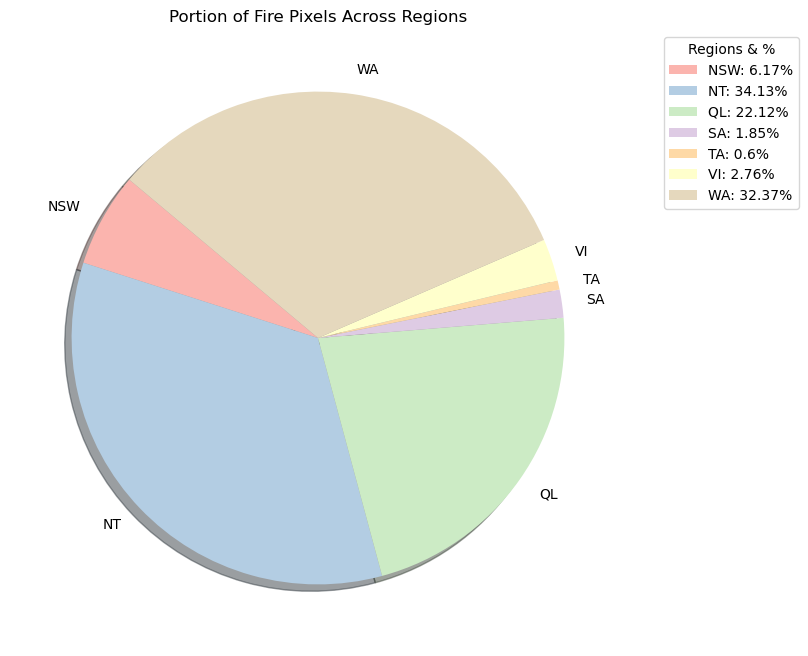

In [31]:
import matplotlib.pyplot as plt

# Aggregate total count of fire pixels by region
region_counts = df.groupby('Region')['Count'].sum()

# Create the pie chart without percentages
plt.figure(figsize=(8, 8))
plt.pie(region_counts, labels=region_counts.index, colors=plt.cm.Pastel1.colors, startangle=140, shadow=True)

# Add title
plt.title('Portion of Fire Pixels Across Regions')

# Add legend with percentages
percentages = [(i, round(k/region_counts.sum()*100, 2)) for i, k in zip(region_counts.index, region_counts)]
plt.legend([f'{i}: {p}%' for i, p in percentages], title="Regions & %", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


#### TASK 1.6: Let's try to develop a histogram of the mean estimated fire brightness
#### Using Matplotlib to create the histogram

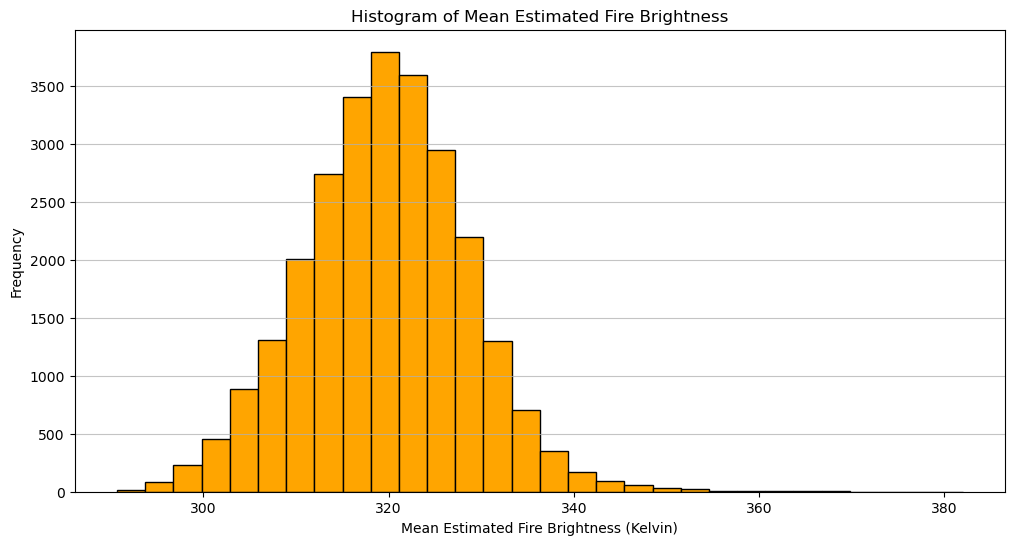

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Create histogram
plt.hist(df['Mean_estimated_fire_brightness'], bins=30, color='orange', edgecolor='black')

# Add title and labels
plt.title('Histogram of Mean Estimated Fire Brightness')
plt.xlabel('Mean Estimated Fire Brightness (Kelvin)')
plt.ylabel('Frequency')

plt.grid(axis='y', alpha=0.75)
plt.show()


##### TASK 1.7: What if we need to understand the distribution of estimated fire brightness across regions? Let's use the functionality of seaborn and pass region as hue

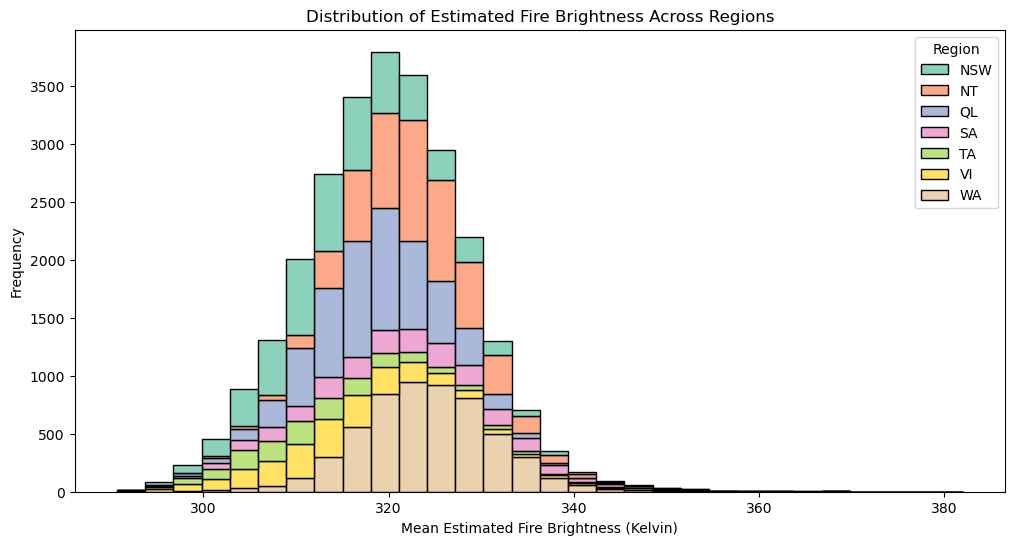

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Seaborn histogram with hue
sns.histplot(data=df, x='Mean_estimated_fire_brightness', hue='Region', bins=30, multiple='stack', palette='Set2')

plt.title('Distribution of Estimated Fire Brightness Across Regions')
plt.xlabel('Mean Estimated Fire Brightness (Kelvin)')
plt.ylabel('Frequency')
plt.show()


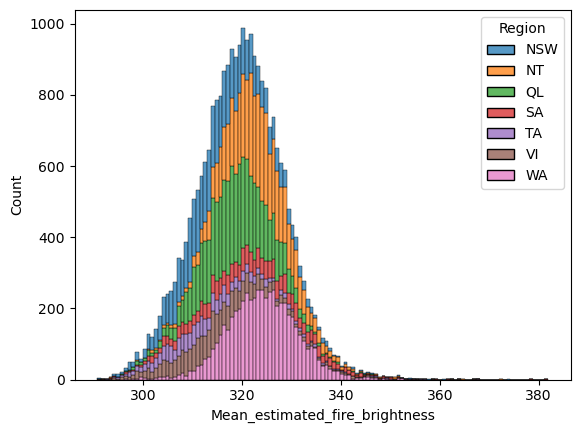

In [34]:
# Creating a stacked histogram to visualize the distribution of mean estimated fire brightness across regions using Seaborn
# Using sns.histplot to create the stacked histogram
# Specifying the DataFrame (data=df) and the column for the x-axis (x='Mean_estimated_fire_brightness')
# Adding hue='Region' to differentiate the distribution across regions
# Setting multiple='stack' to stack the histograms for different regions
sns.histplot(data=df, x='Mean_estimated_fire_brightness', hue='Region', multiple='stack')
plt.show()

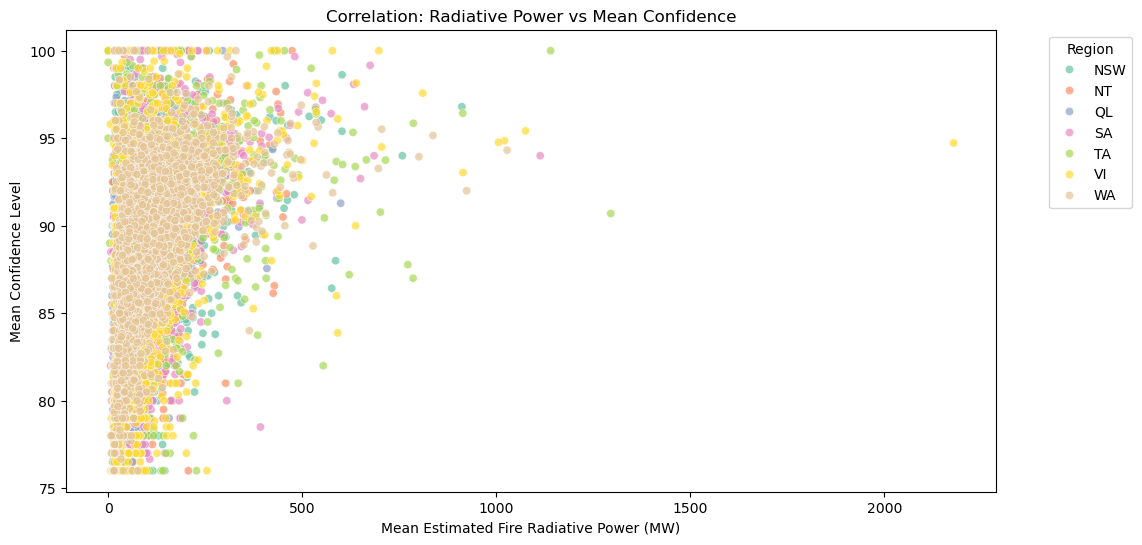

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Scatter plot
sns.scatterplot(
    data=df, 
    x='Mean_estimated_fire_radiative_power', 
    y='Mean_confidence', 
    hue='Region', 
    palette='Set2',
    alpha=0.7
)

plt.title('Correlation: Radiative Power vs Mean Confidence')
plt.xlabel('Mean Estimated Fire Radiative Power (MW)')
plt.ylabel('Mean Confidence Level')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [41]:
import folium

# Example coordinates for the seven regions (replace with accurate lat/lon if available)
region_coords = {
    'New South Wales': [-33.8688, 151.2093],
    'Victoria': [-37.8136, 144.9631],
    'Queensland': [-27.4698, 153.0251],
    'South Australia': [-34.9285, 138.6007],
    'Western Australia': [-31.9505, 115.8605],
    'Tasmania': [-42.8821, 147.3272],
    'Northern Territory': [-12.4634, 130.8456]
}

# Create a map centered on Australia
australia_map = folium.Map(location=[-25, 135], zoom_start=4)

# Add markers for each region
for region, coords in region_coords.items():
    folium.Marker(location=coords, popup=region).add_to(australia_map)

# Display the map
australia_map
